In [9]:
import pandas as pd 
import numpy as np
from pandas import Series, DataFrame

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [11]:
import requests
from io import StringIO

In [12]:
url='http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

source=requests.get(url).text
poll_data=StringIO(source)

In [13]:
df = pd.read_csv(poll_data)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 15 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null int64
Romney                    590 non-null int64
Other                     202 non-null float64
Undecided                 423 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 69.2+ KB


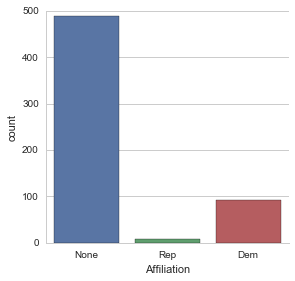

In [15]:
sns.factorplot('Affiliation',data=df,kind='count')

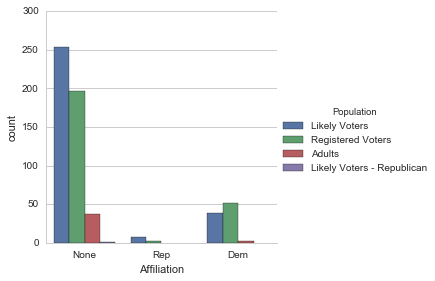

In [16]:
sns.factorplot('Affiliation',data=df,kind='count',hue='Population')

In [17]:
avg = pd.DataFrame(df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

In [18]:
avg

,0
Obama,46.774576
Romney,44.572881
Other,3.400990
Undecided,6.546099


In [19]:
std=pd.DataFrame(df.std())
std.drop('Number of Observations',axis=0,inplace=True)

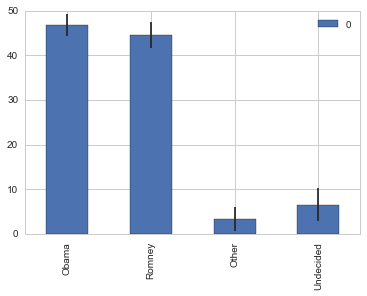

In [20]:
avg.plot(yerr=std,kind='bar',legend=True)

In [21]:
df_avg=pd.concat([avg,std],axis=1)
df_avg.columns=['Average','STD']

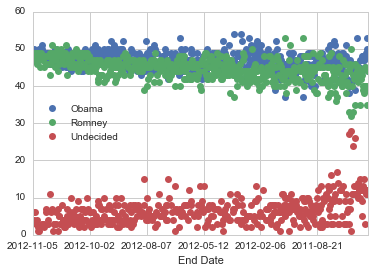

In [22]:
df.plot(x='End Date',y=['Obama','Romney','Undecided'],linestyle='',marker='o')

In [23]:
from datetime import datetime

In [24]:
df['Difference']=(df.Obama-df.Romney)/100

In [25]:
df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48,48,NaN,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
2,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50,49,1.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47,47,NaN,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48,49,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01
5,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49,48,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
6,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49,47,NaN,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48,46,2.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49,49,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,0.00
9,CNN,2012-11-02,2012-11-04,2012-11-04T20:16:09Z,693.0,Likely Voters,Live Phone,49,49,NaN,2.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2012/images/11/04...,Nonpartisan,None,0.00


In [26]:
df=df.groupby(['Start Date'],as_index=False).mean()
df.head()

,Start Date,Number of Observations,Obama,Romney,Other,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,NaN,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,NaN,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,NaN,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,NaN,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,NaN,11.0,0.09


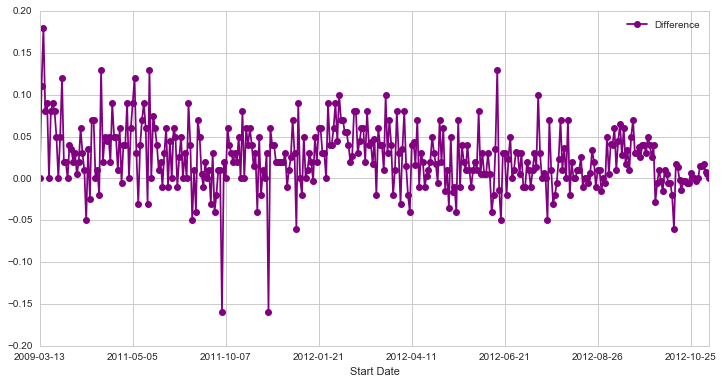

In [27]:
df.plot('Start Date','Difference',figsize=(12,6),linestyle='-',marker='o',color='purple')

In [29]:
row_in=0
xlimit =[]
for date in df['Start Date']:
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in+=1
    else:
        row_in+=1
print(min(xlimit))
print(max(xlimit))

329
356


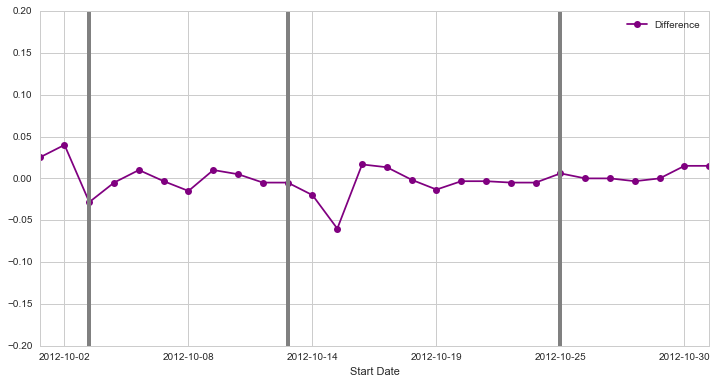

In [32]:
df.plot('Start Date','Difference',figsize=(12,6),linestyle='-',marker='o',color='purple',xlim=(min(xlimit),max(xlimit)))
#Oct 3rd
plt.axvline(x=329+2,linewidth=4,color='grey')
#Oct 11rd
plt.axvline(x=329+10,linewidth=4,color='grey')
#Oct 22nd
plt.axvline(x=329+21,linewidth=4,color='grey')